In [1]:
from google.colab import drive
drive.mount('/content/drive')
current_path='/content/drive/MyDrive'

Mounted at /content/drive


In [2]:
rootdir='/content/drive/MyDrive/23-similarity/data'
targetdir='/content/drive/MyDrive/23-similarity/data_preprocess'

In [ ]:
!rm -rf /content/drive/MyDrive/23-similarity/data_preprocess/Mystical_robot/0001


^C


In [ ]:
import cv2
import os

def video_to_images(video_path,img_paph):
  # Read the video from specified path
  cam = cv2.VideoCapture(video_path)
  currentframe = 0
  count=0
  no_skip_count=0
  while(True):

      # reading from frame
      ret,frame = cam.read()

      if ret:
          no_skip_count+=1
          if no_skip_count%2!=0:
              continue

          # if video is still left continue creating images
          count+=1
          name = 'img_{:05d}.jpg'.format(count)
          print ('Creating...' + name)

          # writing the extracted images
          cv2.imwrite(os.path.join(img_paph,name), frame)

          # increasing counter so that it will
          # show how many frames are created
          currentframe += 1
      else:
          break

  # Release all space and windows once done
  cam.release()
  cv2.destroyAllWindows()

In [ ]:
import os
import shutil
## Iterate over all folders
for folder in os.listdir(rootdir):
    if folder.endswith('.txt'):
      continue
    if folder.endswith('.rar'):
      continue
    subfolder = os.path.join(rootdir, folder)
    targetsubfolder=os.path.join(targetdir,folder)
    if 'Bor' in folder:
      continue
    if 'Mystical_robot' in folder:
      continue
    if 'Disco_robot' in folder:
      continue
    if 'Happy' in folder:
      continue
    count=0
    os.makedirs(targetsubfolder,exist_ok=True)
    ## Iterate over all videos in each folder
    print(folder,"******************")
    for video in os.listdir(subfolder):
        count+=1
        ## Create a new subfolder with the same name as the video
        video_path = os.path.join(subfolder, video)
        targetsubsubfolder=os.path.join(targetsubfolder,'{:04d}'.format(count))
        os.makedirs(targetsubsubfolder,exist_ok=True)
        ## Extract frames from the video
        video_to_images(video_path,targetsubsubfolder)


Streaming output truncated to the last 5000 lines.
Creating...img_00071.jpg
Creating...img_00072.jpg
Creating...img_00073.jpg
Creating...img_00074.jpg
Creating...img_00075.jpg
Creating...img_00076.jpg
Creating...img_00077.jpg
Creating...img_00078.jpg
Creating...img_00079.jpg
Creating...img_00080.jpg
Creating...img_00081.jpg
Creating...img_00082.jpg
Creating...img_00083.jpg
Creating...img_00084.jpg
Creating...img_00085.jpg
Creating...img_00086.jpg
Creating...img_00087.jpg
Creating...img_00088.jpg
Creating...img_00089.jpg
Creating...img_00090.jpg
Creating...img_00091.jpg
Creating...img_00092.jpg
Creating...img_00093.jpg
Creating...img_00094.jpg
Creating...img_00095.jpg
Creating...img_00096.jpg
Creating...img_00097.jpg
Creating...img_00098.jpg
Creating...img_00099.jpg
Creating...img_00100.jpg
Creating...img_00101.jpg
Creating...img_00102.jpg
Creating...img_00103.jpg
Creating...img_00104.jpg
Creating...img_00105.jpg
Creating...img_00106.jpg
Creating...img_00107.jpg
Creating...img_00108.jpg

In [4]:
import os
with open(os.path.join(rootdir,'label.txt'),'w') as f:
  count=-1
  for folder in os.listdir(targetdir):
    count+=1
    subfolder = os.path.join(targetdir, folder)
    for video in os.listdir(subfolder):
        print(video)
        targetsubsubfolder=os.path.join(subfolder,video)
        img_num = len(os.listdir(targetsubsubfolder))
        class_num = count
        f.write(os.path.join(folder,video)+' 1 '+str(img_num)+' '+str(count)+'\n')


0002
0003
0004
0005
0006
0001
0007
0008
0009
0010
0011
0012
0013
0014
0015
0016
0017
0018
0019
0020
0001
0002
0003
0004
0005
0006
0007
0008
0009
0010
0011
0012
0013
0014
0015
0016
0017
0018
0019
0020
0001
0002
0003
0004
0005
0006
0007
0008
0009
0010
0011
0012
0013
0014
0015
0016
0017
0018
0019
0020
0021
0001
0002
0003
0004
0005
0006
0007
0008
0009
0010
0011
0012
0013
0014
0015
0016
0017
0018
0019
0020
0001
0002
0003
0004
0005
0006
0007
0008
0009
0010
0011
0012
0013
0014
0015
0016
0017
0018
0019
0020
0001
0002
0003
0004
0005
0006
0007
0008
0009
0010
0011
0012
0013
0014
0015
0016
0017
0018
0019
0020
0021
0022
0001
0002
0003
0004
0005
0006
0007
0008
0009
0010
0011
0012
0013
0014
0015
0016
0017
0018
0019
0020
0001
0002
0003
0004
0005
0006
0007
0008
0009
0010
0011
0012
0013
0014
0015
0016
0017
0018


In [5]:
import sys
sys.path.append("/content/drive/MyDrive/23-similarity/similarity-assessment/i3d")

In [6]:
import torch
from torch import nn
from torch.utils.data import DataLoader, random_split
from torchvision import datasets
import torchvision.transforms as transforms
import torchvision.models as models
from i3d import I3D
import numpy as np
from matplotlib import pyplot as plt

In [7]:
from videoset_dataset import  VideoFrameDataset, ImglistToTensor
from torchvision import transforms
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import os


In [8]:
videos_root="/content/drive/MyDrive/23-similarity/data_preprocess"
annotation_file="/content/drive/MyDrive/23-similarity/data_preprocess/label.txt"


In [9]:
"""
Ignore this function and look at "main" below.
"""
def plot_video(rows, cols, frame_list, plot_width, plot_height, title: str):
    fig = plt.figure(figsize=(plot_width, plot_height))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(rows, cols),  # creates 2x2 grid of axes
                     axes_pad=0.3,  # pad between axes in inch.
                     )

    for index, (ax, im) in enumerate(zip(grid, frame_list)):
        # Iterating over the grid returns the Axes.
        ax.imshow(im)
        ax.set_title(index)
    plt.suptitle(title)
    plt.show()


end:  176
start:  1
num:  176
end:  176
start:  1
start:  1
end:  176
end:  176
start:  1
num:  176
end:  176
start:  1
end:  193
start:  1
num:  193
end:  193
start:  1
start:  1
end:  193
end:  193
start:  1
num:  193
end:  193
start:  1
end:  230
start:  1
num:  230
end:  230
start:  1
start:  1
end:  230
end:  230
start:  1
num:  230
end:  230
start:  1
end:  212
start:  1
num:  212
end:  212
start:  1
start:  1
end:  212
end:  212
start:  1
num:  212
end:  212
start:  1
end:  169
start:  1
num:  169
end:  169
start:  1
start:  1
end:  169
end:  169
start:  1
num:  169
end:  169
start:  1
end:  229
start:  1
num:  229
end:  229
start:  1
start:  1
end:  229
end:  229
start:  1
num:  229
end:  229
start:  1
end:  193
start:  1
num:  193
end:  193
start:  1
start:  1
end:  193
end:  193
start:  1
num:  193
end:  193
start:  1
end:  218
start:  1
num:  218
end:  218
start:  1
start:  1
end:  218
end:  218
start:  1
num:  218
end:  218
start:  1
end:  214
start:  1
num:  214
end:  214


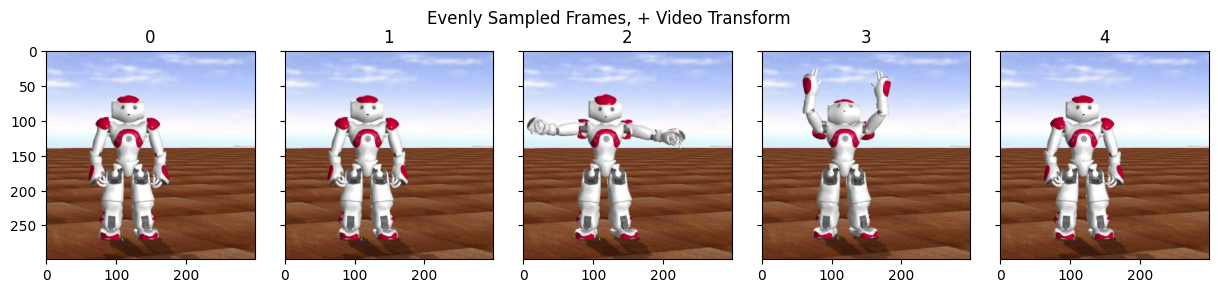

end: end:  end:   209344

314
start: start:  1start:   
num:  1end: 1314 

end: 
825num: 
num:   209 start: 
314 344
1
end: start:  209

end: start:   num:  3441
1 
825
start: start:  start:  
1
 1end:  
1825start: 

 start: 1 
1
start:  1
end:  209
end:  314end: 
 344
end: end:   825209

end:  344
end:  209
end: end:   314825

end:  344
end:  344
end:  end: 209 
825
end:  314
end:  209
end:  end: 344 
825end:  314

label case: len=4  4
end:  374
start:  1
num:  374
end:  374
start:  1
start:  end: end:  825
1
 314
end:  374
label case: len=4  5
end:  500
start:  1end: label case: len=4 
 num:  3742
 end: 
 625
 500start: 1

num:  625
end: end:  625
 500start: 
 start: 1 1

start:  1
start:  1
label case: len=4  6
end:  335end: 
start:   1374

num:  335
end:  335
start:  1
start:  1
end:  625
end:  500
end:  335
end:  625
end:  374
end:  500
end:  335
end:  625
end:  500
end:  625
end:  374
end:  335
end: end:   625
500
end:  335
label case: len=4  end: 5 500

end:  173end:  
start: 33

In [13]:
 """ DEMO 3 WITH TRANSFORMS """
# As of torchvision 0.8.0, torchvision transforms support batches of images
# of size (BATCH x CHANNELS x HEIGHT x WIDTH) and apply deterministic or random
# transformations on the batch identically on all images of the batch. Any torchvision
# transform for image augmentation can thus also be used  for video augmentation.
preprocess = transforms.Compose([
    ImglistToTensor(),  # list of PIL images to (FRAMES x CHANNELS x HEIGHT x WIDTH) tensor
    transforms.Resize(299),  # image batch, resize smaller edge to 299
    transforms.CenterCrop(299),  # image batch, center crop to square 299x299
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

dataset = VideoFrameDataset(
    root_path=videos_root,
    annotationfile_path=annotation_file,
    num_segments=5,
    frames_per_segment=1,
    imagefile_template='img_{:05d}.jpg',
    transform=preprocess,
    test_mode=False
)

sample = dataset[2]
frame_tensor = sample[0]  # tensor of shape (NUM_SEGMENTS*FRAMES_PER_SEGMENT) x CHANNELS x HEIGHT x WIDTH
label = sample[1]  # integer label

print('Video Tensor Size:', frame_tensor.size())

def denormalize(video_tensor):
    """
    Undoes mean/standard deviation normalization, zero to one scaling,
    and channel rearrangement for a batch of images.
    args:
        video_tensor: a (FRAMES x CHANNELS x HEIGHT x WIDTH) tensor
    """
    inverse_normalize = transforms.Normalize(
        mean=[-0.485 / 0.229, -0.456 / 0.224, -0.406 / 0.225],
        std=[1 / 0.229, 1 / 0.224, 1 / 0.225]
    )
    return (inverse_normalize(video_tensor) * 255.).type(torch.uint8).permute(0, 2, 3, 1).numpy()


frame_tensor = denormalize(frame_tensor)
plot_video(rows=1, cols=5, frame_list=frame_tensor, plot_width=15., plot_height=3.,
            title='Evenly Sampled Frames, + Video Transform')



""" DEMO 3 CONTINUED: DATALOADER """
dataloader = torch.utils.data.DataLoader(
    dataset=dataset,
    batch_size=2,
    shuffle=True,
    num_workers=4,
    pin_memory=True
)

for epoch in range(10):
    for video_batch, labels in dataloader:
        """
        Insert Training Code Here
        """
        print(labels)
        print("\nVideo Batch Tensor Size:", video_batch.size())
        print("Batch Labels Size:", labels.size())
        break
    break



/bin/bash: tree: command not found


In [ ]:
for epoch in range(10):
    for video_batch, labels in dataloader:
      print(labels)

ValueError: ignored

In [1]:
! git add .
! git commit -m "


fatal: not a git repository (or any of the parent directories): .git
